In [2]:
#obtaining top leafsubhaloid

import h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import illustris_python as il
from tqdm import tqdm

def hdf5_to_dict(file_path):
    data_dict = {}
    
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursively traverse the HDF5 file and populate the dictionary
        def traverse(name, obj):
            if isinstance(obj, h5py.Dataset):
                data_dict[name] = obj[()]  # Store dataset value in dictionary
            elif isinstance(obj, h5py.Group):
                # Create a nested dictionary for groups
                group_dict = {}
                data_dict[name] = group_dict
                
                # Recursively visit the group's children
                obj.visititems(traverse)
        
        hdf_file.visititems(traverse)
    
    return data_dict

In [3]:
file_path = '/u/vrg/StellarAssembly/output/IllustrisTNG/L35n2160TNG/unique_ids_099.hdf5'
data_rodriguez_099 = hdf5_to_dict(file_path)

In [4]:
data_rodriguez_099_df = pd.DataFrame(data_rodriguez_099)
data_rodriguez_099_df.head()

,LeafSubhaloID
0,600373
1,600345
2,600345
3,589488
4,600345


In [5]:
subhaloid_list = [547844, 455291, 478216, 501208, 531910, 570319, 571633, 582137, 589496, 598112, 606820, 619381, 628949]
subhaloid = subhaloid_list[0]

filename = 'tables/subhalo'
filename += str(subhaloid)
filename += '.0.csv'

subhalo_df = pd.read_csv(filename)
subhalo_df.head()

,Unnamed: 0,M,x,y,z,Vx,Vy,Vz,Metallicity,U,StellarFormationTime,R,Jx,Jy,Jz,Total Energy,Circularity,ParticleIDs
0,0,53560.527344,0.029338,-0.018787,0.050264,-13.022654,39.013739,26.462412,0.946068,-248328.781250,0.280318,0.061157,-2.458153,-1.430931,0.899929,-247132.820952,0.109996,118896913475
1,1,49830.773438,-0.002267,0.034888,0.016861,-24.639224,66.195138,5.425658,2.148515,-248640.250000,0.309119,0.038815,-0.926806,-0.403136,0.709570,-246131.087295,0.086729,121068771044
2,2,49054.761719,0.156650,-0.127388,-0.002921,-35.227336,29.575495,8.363533,2.436078,-247214.484375,0.340445,0.201930,-0.979014,-1.207235,0.145455,-246121.672491,0.017779,122298304386
3,3,65541.531250,0.138966,-0.009450,0.024993,18.796672,49.023140,-20.606975,1.539409,-247484.671875,0.286720,0.141512,-1.030483,3.333459,6.990206,-245894.056589,0.854392,118459758029
4,4,56322.742188,-0.079920,0.201489,-0.046180,-23.079251,-40.952395,-19.311553,1.249086,-246930.515625,0.229181,0.221625,-5.782247,-0.477571,7.923111,-245639.172363,0.597183,114774240464


In [7]:
fields = ['ParticleIDs']
basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
particleID = il.snapshot.loadSubset(basePath, 99, 'star', fields=fields)

array([146390141809, 148377919050, 147257453292, ..., 153690397674,
       153714199007, 153715459465], dtype=uint64)

In [12]:
#ahora tenemos que juntar el particleIDS y el origen leafsubhaloID, para luego congeniar esta nueva tabla con las de las particulas del subhalo.

#ejemplo de variables
#data_rodriguez_099_df = pd.DataFrame({'LeafSubhaloID':[1,2,3,4,5,6]})
#particleID = np.array([1,2,3,4,5,6])

particleID_df = pd.DataFrame({'ParticleIDs': particleID})

dataframe_leaf_particleid = pd.concat([data_rodriguez_099_df,particleID_df], axis=1)

dataframe_leaf_particleid
#esta ultima ya es una tabla global, que contiene todas las particulas del snapshot

,LeafSubhaloID,ParticleIDs
0,600373,146390141809
1,600345,148377919050
2,600345,147257453292
3,589488,148215869008
4,600345,148542692459
...,...,...
1289575326,18446744073709551615,153604166338
1289575327,18446744073709551615,153681782009
1289575328,18446744073709551615,153690397674
1289575329,18446744073709551615,153714199007


In [14]:
#realizar merge de ambas tablas ahora
full_subhalo_df = subhalo_df.merge(dataframe_leaf_particleid, left_on='ParticleIDs', right_on='ParticleIDs')


,Unnamed: 0,M,x,y,z,Vx,Vy,Vz,Metallicity,U,StellarFormationTime,R,Jx,Jy,Jz,Total Energy,Circularity,ParticleIDs,LeafSubhaloID
0,0,53560.527344,0.029338,-0.018787,0.050264,-13.022654,39.013739,26.462412,0.946068,-248328.781250,0.280318,0.061157,-2.458153,-1.430931,0.899929,-247132.820952,0.109996,118896913475,70000008000000099
1,1,49830.773438,-0.002267,0.034888,0.016861,-24.639224,66.195138,5.425658,2.148515,-248640.250000,0.309119,0.038815,-0.926806,-0.403136,0.709570,-246131.087295,0.086729,121068771044,70000008000000099
2,2,49054.761719,0.156650,-0.127388,-0.002921,-35.227336,29.575495,8.363533,2.436078,-247214.484375,0.340445,0.201930,-0.979014,-1.207235,0.145455,-246121.672491,0.017779,122298304386,70000008000000099
3,3,65541.531250,0.138966,-0.009450,0.024993,18.796672,49.023140,-20.606975,1.539409,-247484.671875,0.286720,0.141512,-1.030483,3.333459,6.990206,-245894.056589,0.854392,118459758029,70000008000000099
4,4,56322.742188,-0.079920,0.201489,-0.046180,-23.079251,-40.952395,-19.311553,1.249086,-246930.515625,0.229181,0.221625,-5.782247,-0.477571,7.923111,-245639.172363,0.597183,114774240464,70000008000000099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733769,733769,67198.007812,-86.223956,-76.031285,128.463193,-100.872864,-28.987809,104.619977,0.164082,-14393.847656,0.328942,172.389440,-4230.524825,-3937.701831,-5170.049893,-3413.363953,-0.466842,118994478381,18446744073709551615
733770,733770,63961.921875,-105.229805,-69.967629,143.385221,-95.619197,-13.117346,93.503625,0.208714,-12107.119141,0.331239,191.123266,-4661.393435,-3871.011306,-5309.912724,-3078.107390,-0.479472,122725741504,18446744073709551615
733771,733771,47790.851562,-37.873371,-50.727537,59.469543,-170.984703,-49.469044,171.895932,0.151460,-33190.253906,0.313626,86.857940,-5777.955787,-3658.103727,-6800.073367,-2574.670551,-0.614029,120721114462,70000008000005710
733772,733772,100109.351562,30.613569,102.064351,14.422995,70.868482,217.408505,28.744389,2.127625,-26036.501953,0.977618,107.528346,-201.904345,142.167426,-577.495418,521.017819,-0.052146,153549209168,70000008000000099


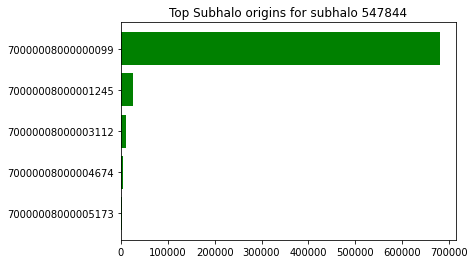

In [16]:
#SUBHALO ORIGIN TOP
design_color='green'

subhalos_origen = full_subhalo_df['LeafSubhaloID']
subhalos_origen = subhalos_origen.astype(str)

unicos_subhalos, cuentas = np.unique(subhalos_origen, return_counts=True)

indices_ordenados = np.argsort(-cuentas)
subhalos_orden = unicos_subhalos[indices_ordenados]
cuentas_orden = cuentas[indices_ordenados]

top5_subhalos = subhalos_orden[:5]
top5_cuentas = cuentas_orden[:5]

plt.barh(top5_subhalos,top5_cuentas,color=design_color)
plt.gca().invert_yaxis()
plt.title('Top Subhalo origins for subhalo %s'%subhaloid)
plt.show()